In [1]:
# import cv2 

# img = cv2.imread('Imagenes/robo/11.jpg')
# print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU


# Cargar set de Imágenes

In [4]:
dirname = os.path.join(os.getcwd(),'Desktop\9no Semestre\IA\CNN\Imageness')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\lendr\Desktop\9no Semestre\IA\CNN\Imageness\
C:\Users\lendr\Desktop\9no Semestre\IA\CNN\Imageness\asalto 1
C:\Users\lendr\Desktop\9no Semestre\IA\CNN\Imageness\incendio 6709
C:\Users\lendr\Desktop\9no Semestre\IA\CNN\Imageness\inundacion 9389
C:\Users\lendr\Desktop\9no Semestre\IA\CNN\Imageness\robo 5240
C:\Users\lendr\Desktop\9no Semestre\IA\CNN\Imageness\tornado 8765
Directorios leidos: 5
Imagenes en cada directorio [6710, 9389, 5240, 8765, 8435]
suma Total de imagenes en subdirs: 38539


# Creamos las etiquetas

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  38539


In [6]:
risk=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    risk.append(name[len(name)-1])
    indice=indice+1

0 asalto
1 incendio
2 inundacion
3 robo
4 tornado


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (30831, 28, 28, 3) (30831,)
Testing data shape :  (7708, 28, 28, 3) (7708,)


Text(0.5, 1.0, 'Ground Truth : 3')

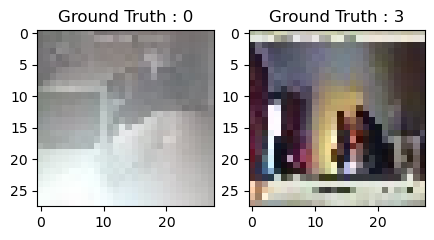

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

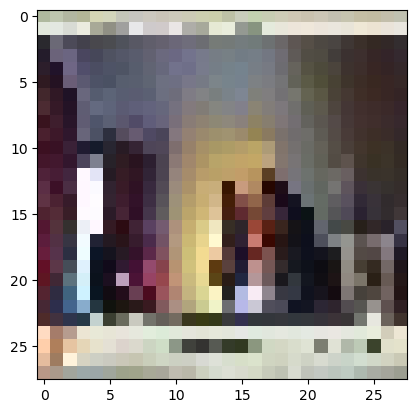

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(24664, 28, 28, 3) (6167, 28, 28, 3) (24664, 5) (6167, 5)


# Creamos el modelo de CNN

In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 30 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
risk_model = Sequential()
risk_model.add(Input(shape=(28, 28, 3)))  # Medida de las imagenes procesar 28x28
risk_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
risk_model.add(LeakyReLU(negative_slope=0.1))
risk_model.add(MaxPooling2D((2, 2), padding='same'))
risk_model.add(Dropout(0.5))

risk_model.add(Flatten())
risk_model.add(Dense(32, activation='linear'))
risk_model.add(LeakyReLU(negative_slope=0.1))
risk_model.add(Dropout(0.5))
risk_model.add(Dense(nClasses, activation='softmax'))

In [16]:
risk_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         200,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,797 (788.27 KB)

 Trainable params: 201,797 (788.27 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
INIT_LR = 0.01  # Tasa de aprendizaje inicial
decay_steps = 100  # Número de pasos de decaimiento (puedes ajustarlo según sea necesario)
decay_rate = 0.96  # Factor de decaimiento (puedes ajustarlo según sea necesario)

# Definir el programador de tasa de aprendizaje
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)

# Compilar el modelo con el optimizador actualizado
risk_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
    metrics=['accuracy']
)


# Entrenamos el modelo: Aprende a clasificar imágenes

In [18]:
risk_train = risk_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.5324 - loss: 1.1875 - val_accuracy: 0.8769 - val_loss: 0.4311
Epoch 2/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8188 - loss: 0.5484 - val_accuracy: 0.9322 - val_loss: 0.3003
Epoch 3/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8708 - loss: 0.4191 - val_accuracy: 0.9364 - val_loss: 0.2402
Epoch 4/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8897 - loss: 0.3714 - val_accuracy: 0.9411 - val_loss: 0.2109
Epoch 5/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9078 - loss: 0.3223 - val_accuracy: 0.9481 - val_loss: 0.1958
Epoch 6/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9143 - loss: 0.3001 - val_accuracy: 0.9549 - val_loss: 0.1802
Epoch 7/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9181 - loss: 0.2923 - val_accuracy: 0.9564 - val_loss: 0.1674
Epoch 8/30
386/386 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9225 - loss: 0.2765 - 

In [19]:
# guardar el modelo en el nuevo formatoyy
risk_model.save("Desktop\\9no Semestre\\IA\\CNN\\Dos.keras")

# Evaluamos la red

In [20]:
test_eval = risk_model.evaluate(test_X, test_Y_one_hot, verbose=1)

241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9682 - loss: 0.1135


In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.12180905044078827
Test accuracy: 0.9669175148010254


In [22]:
risk_train.history

{'accuracy': [0.6628283858299255,
  0.8391177654266357,
  0.8773921728134155,
  0.8953940868377686,
  0.907030463218689,
  0.9143691062927246,
  0.9200454354286194,
  0.9243026375770569,
  0.927343487739563,
  0.9301005601882935,
  0.9321277737617493,
  0.9335063099861145,
  0.9346415996551514,
  0.9356957674026489,
  0.9370743036270142,
  0.9373175501823425,
  0.9382500648498535,
  0.9377635717391968,
  0.9369931817054749,
  0.938736617565155,
  0.9409260749816895,
  0.9397502541542053,
  0.9408854842185974,
  0.9393853545188904,
  0.9420613050460815,
  0.9405205845832825,
  0.9421018362045288,
  0.9406017065048218,
  0.9414531588554382,
  0.9423045516014099],
 'loss': [0.9163405299186707,
  0.5047214031219482,
  0.4044666290283203,
  0.35735708475112915,
  0.3216422200202942,
  0.2996794879436493,
  0.28594815731048584,
  0.2707999646663666,
  0.2629988193511963,
  0.25081759691238403,
  0.24211211502552032,
  0.24046292901039124,
  0.23580406606197357,
  0.23278476297855377,
  0.228

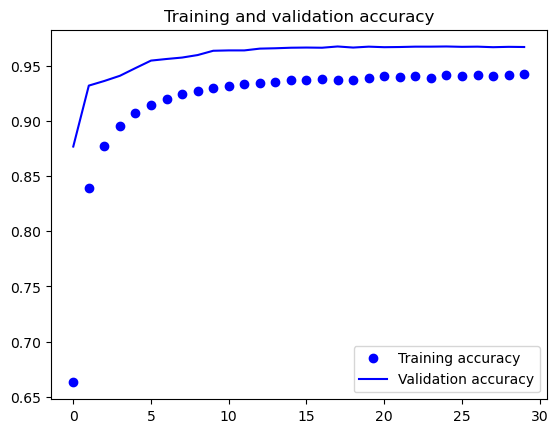

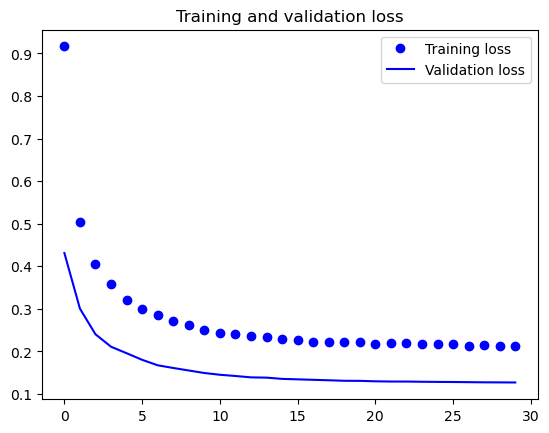

In [23]:
accuracy = risk_train.history['accuracy']
val_accuracy = risk_train.history['val_accuracy']
loss = risk_train.history['loss']
val_loss = risk_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
predicted_classes2 = risk_model.predict(test_X)

241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [25]:
predicted_classes=[]
for predicted_risk in predicted_classes2:
    predicted_classes.append(predicted_risk.tolist().index(max(predicted_risk)))
predicted_classes=np.array(predicted_classes)

In [26]:
predicted_classes.shape, test_Y.shape

((7708,), (7708,))

# Aprendamos de los errores: Qué mejorar

Found 7453 correct labels


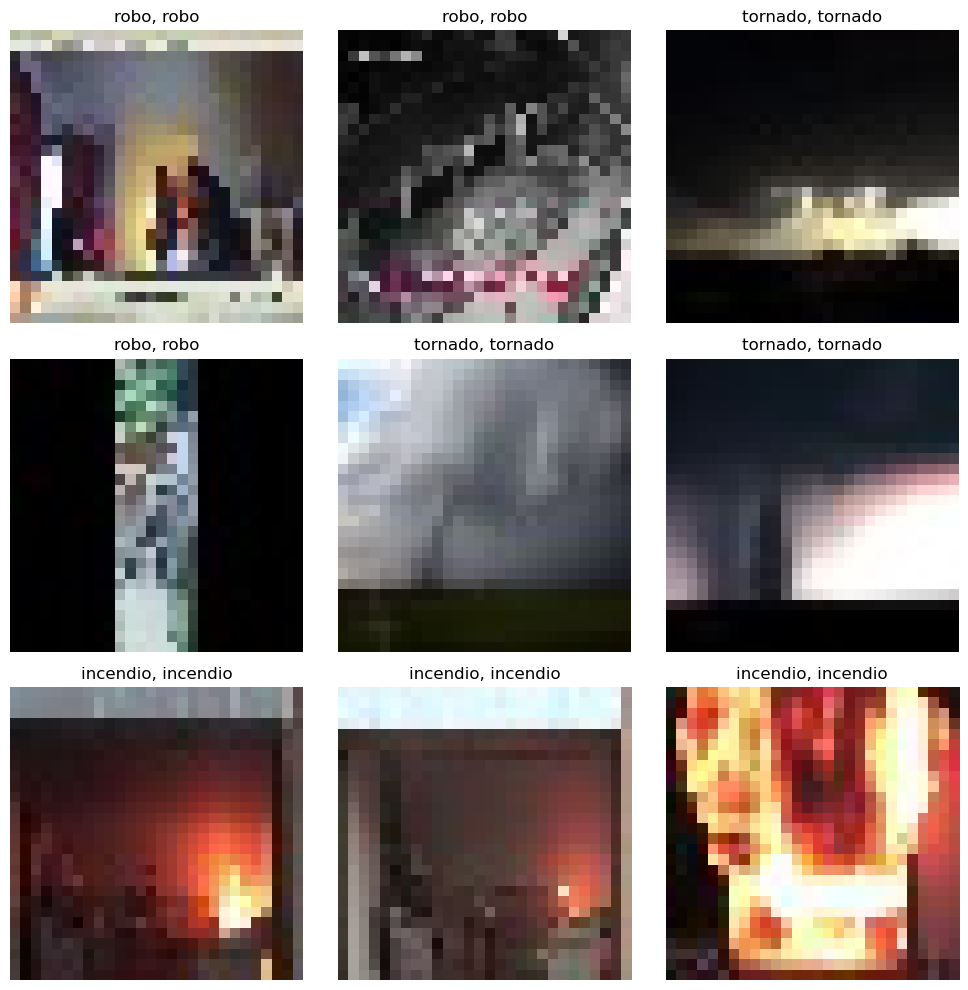

In [27]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))

# Crear una figura
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, correct in enumerate(correct[0:9]):
    ax = axes[i // 3, i % 3]  # Seleccionar el eje correspondiente
    ax.imshow(test_X[correct].reshape(28, 28, 3), cmap='gray', interpolation='none')
    ax.set_title("{}, {}".format(risk[predicted_classes[correct]], risk[test_Y[correct]]))
    ax.axis('off')  # Opcional: oculta los ejes

plt.tight_layout()
plt.show()

Found 255 incorrect labels


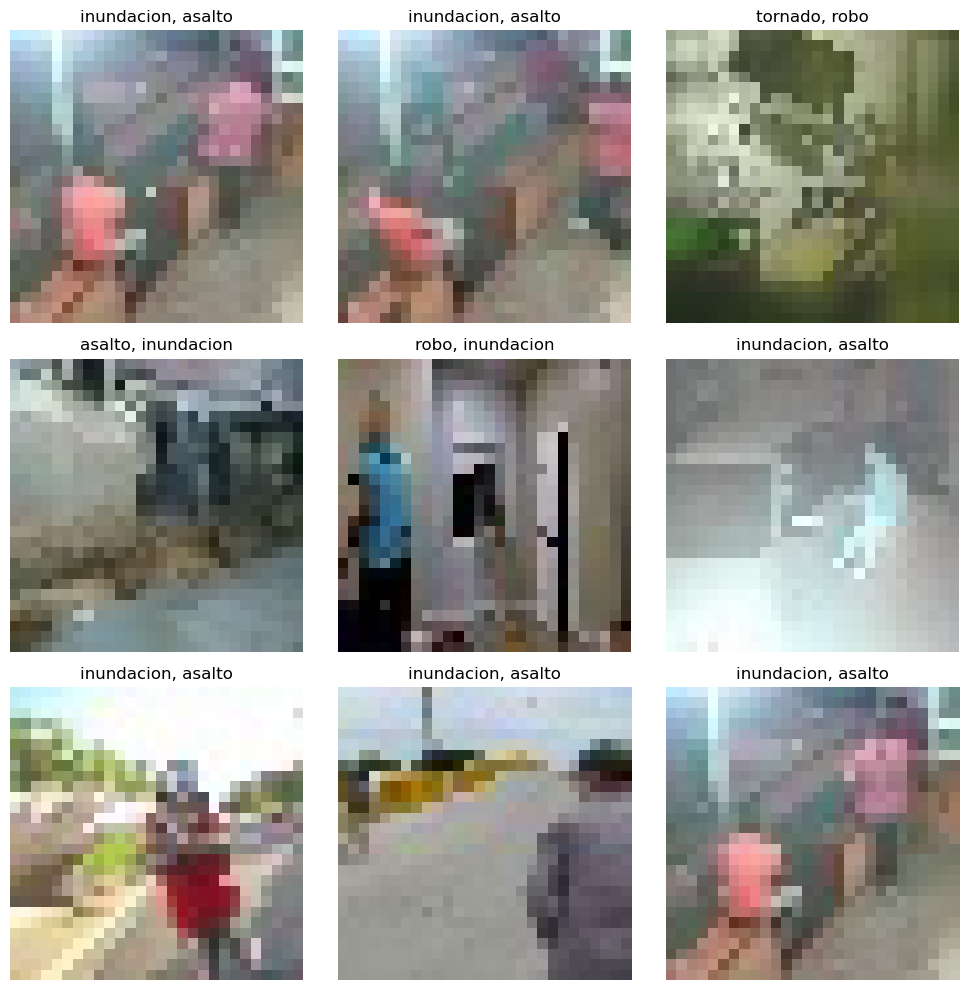

In [28]:
incorrect = np.where(predicted_classes != test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))

# Crear una figura
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, incorrect in enumerate(incorrect[0:9]):
    ax = axes[i // 3, i % 3]  # Seleccionar el eje correspondiente
    ax.imshow(test_X[incorrect].reshape(28, 28, 3), cmap='gray', interpolation='none')
    ax.set_title("{}, {}".format(risk[predicted_classes[incorrect]], risk[test_Y[incorrect]]))
    ax.axis('off')  # Opcional: oculta los ejes

plt.tight_layout()
plt.show()

In [29]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.93      0.96      1339
     Class 1       1.00      0.99      0.99      1912
     Class 2       0.87      0.96      0.91      1024
     Class 3       0.97      0.98      0.98      1761
     Class 4       0.98      0.96      0.97      1672

    accuracy                           0.97      7708
   macro avg       0.96      0.96      0.96      7708
weighted avg       0.97      0.97      0.97      7708



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


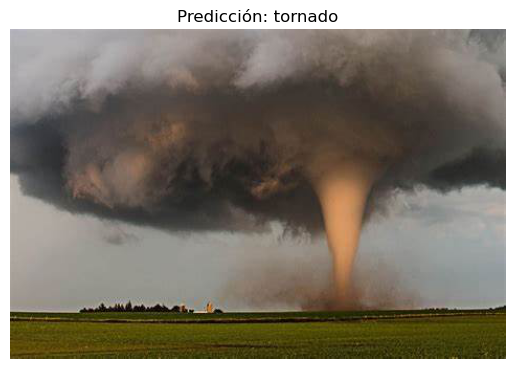

Downloads\Catastrofes\Tornado1.jpeg tornado


In [36]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np

# Definimos una lista para las imágenes y los nombres de archivo
images = []
filenames = [
            'Downloads\Catastrofes\Tornado1.jpeg',
            ]

# Iteramos sobre los nombres de archivo para cargar y redimensionar las imágenes
for filepath in filenames:
    image = plt.imread(filepath)  # No especificar 0 para leer en color
    image_resized = resize(image, (28, 28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

# Convertimos la lista de imágenes a un array numpy
X = np.array(images, dtype=np.uint8)
test_X = X.astype('float32')
test_X = test_X / 255.0

# Realizamos la predicción usando el modelo
predicted_classes = risk_model.predict(test_X)

# Definimos una lista con las posibles clases (esto depende de tu modelo)
risk = ['asalto', 'incendio', 'inundacion', 'robo', 'tornado']  # Ejemplo de clases

# Iteramos sobre las predicciones y mostramos la imagen con la predicción correspondiente
for i, img_tagged in enumerate(predicted_classes):
    # Mostramos la imagen original
    original_image = plt.imread(filenames[i])  # Cargamos la imagen original para mostrarla
    plt.imshow(original_image)
    plt.title(f"Predicción: {risk[img_tagged.tolist().index(max(img_tagged))]}")
    plt.axis('off')  # Opcional: para ocultar los ejes
    plt.show()
    
    # Imprimimos el nombre del archivo y la predicción
    print(filenames[i], risk[img_tagged.tolist().index(max(img_tagged))])